In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('master_table.csv', index_col='primary_title')
df.shape

(17172, 33)

# Drop rows with Budgets < 1000

In [3]:
df = df.drop(df[df.Budget < 1000].index)

# Detecting Outliers

Anything under lower_bound should be considered an outlier, and anything over the upper_bound should be considered an outlier. 

In [4]:
df['Profit'] = df['Profit'].astype(float)
df = df.replace(0, np.nan)
df['Profit']

primary_title
Jurassic World           1.520401e+09
John Carter              3.413910e+07
Alice in Wonderland      8.254678e+08
From Paris with Love     8.444960e+05
The Bourne Legacy        1.511448e+08
                             ...     
Dying to Survive         4.361834e+08
The Bachelor 2           1.310969e+06
Prince In Exile         -8.757249e+06
Goodachari              -5.550310e+05
Sajjan Singh Rangroot   -1.385315e+06
Name: Profit, Length: 5264, dtype: float64

In [5]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
outlier = iqr * 1.5
outlier #outlier thresholds
lower_bound = q1 - outlier
upper_bound = q3 + outlier

# Adding ROI Column

In [6]:

df['Roi'] = ((df['Cumulative Worldwide Gross'] - df['Budget'])/df['Budget'])*100
df['Roi'] = df['Roi'].replace(np.inf, np.nan)

# Which Countries are Making Movies

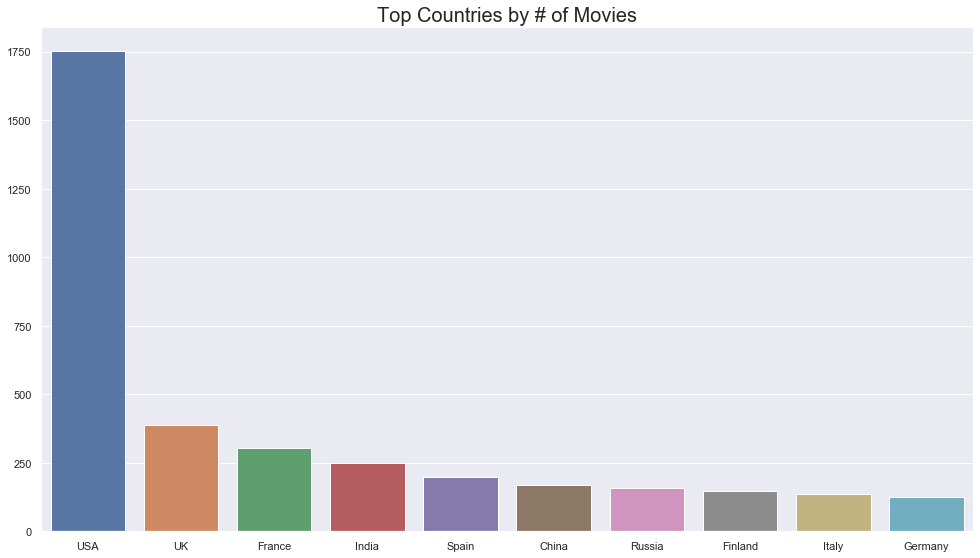

In [7]:
movie_count_by_country = df['Country'].value_counts()
sns.set(style="whitegrid")
y = movie_count_by_country[:10].values
x = movie_count_by_country[:10].index
sns.set(rc={'figure.figsize':(16.7,9.27)})

sns.barplot(x,y).set_title('Top Countries by # of Movies', size=20);

# Total Money Spent on Movies Per Country

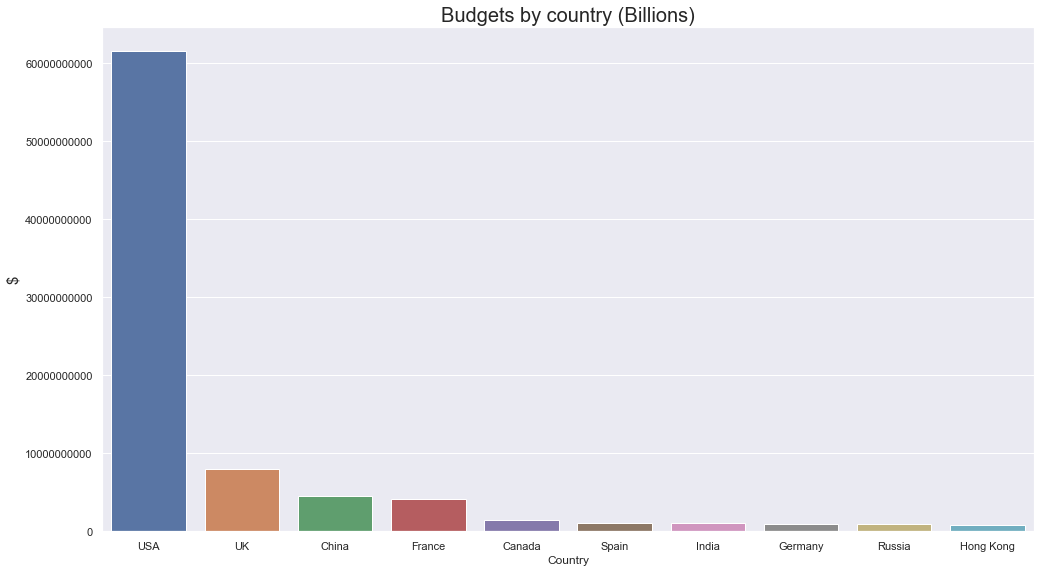

In [8]:
most_money_spent_by_country = df['Budget'].groupby(df['Country']).sum().sort_values(ascending=False)

sns.set(style="whitegrid")
y = most_money_spent_by_country[:10].values
x = most_money_spent_by_country[:10].index
sns.set(rc={'figure.figsize':(16.7,9.27)})
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("$", size=15)

sns.barplot(x,y).set_title('Budgets by country (Billions)', size=20);

# Top 10 Highest Grossing Movies

In [9]:
highest_grossing = df.groupby(['primary_title']).sum()['Cumulative Worldwide Gross'].sort_values(ascending=False)[:10]
highest_grossing

primary_title
Avengers: Endgame                               2797800564
Star Wars: Episode VII - The Force Awakens      2068224036
Jurassic World                                  1670401444
The Avengers                                    1518815515
Furious 7                                       1515048151
Frozen II                                       1450026933
Avengers: Age of Ultron                         1402809540
Black Panther                                   1347426059
Harry Potter and the Deathly Hallows: Part 2    1342191687
Star Wars: The Last Jedi                        1332540187
Name: Cumulative Worldwide Gross, dtype: int64

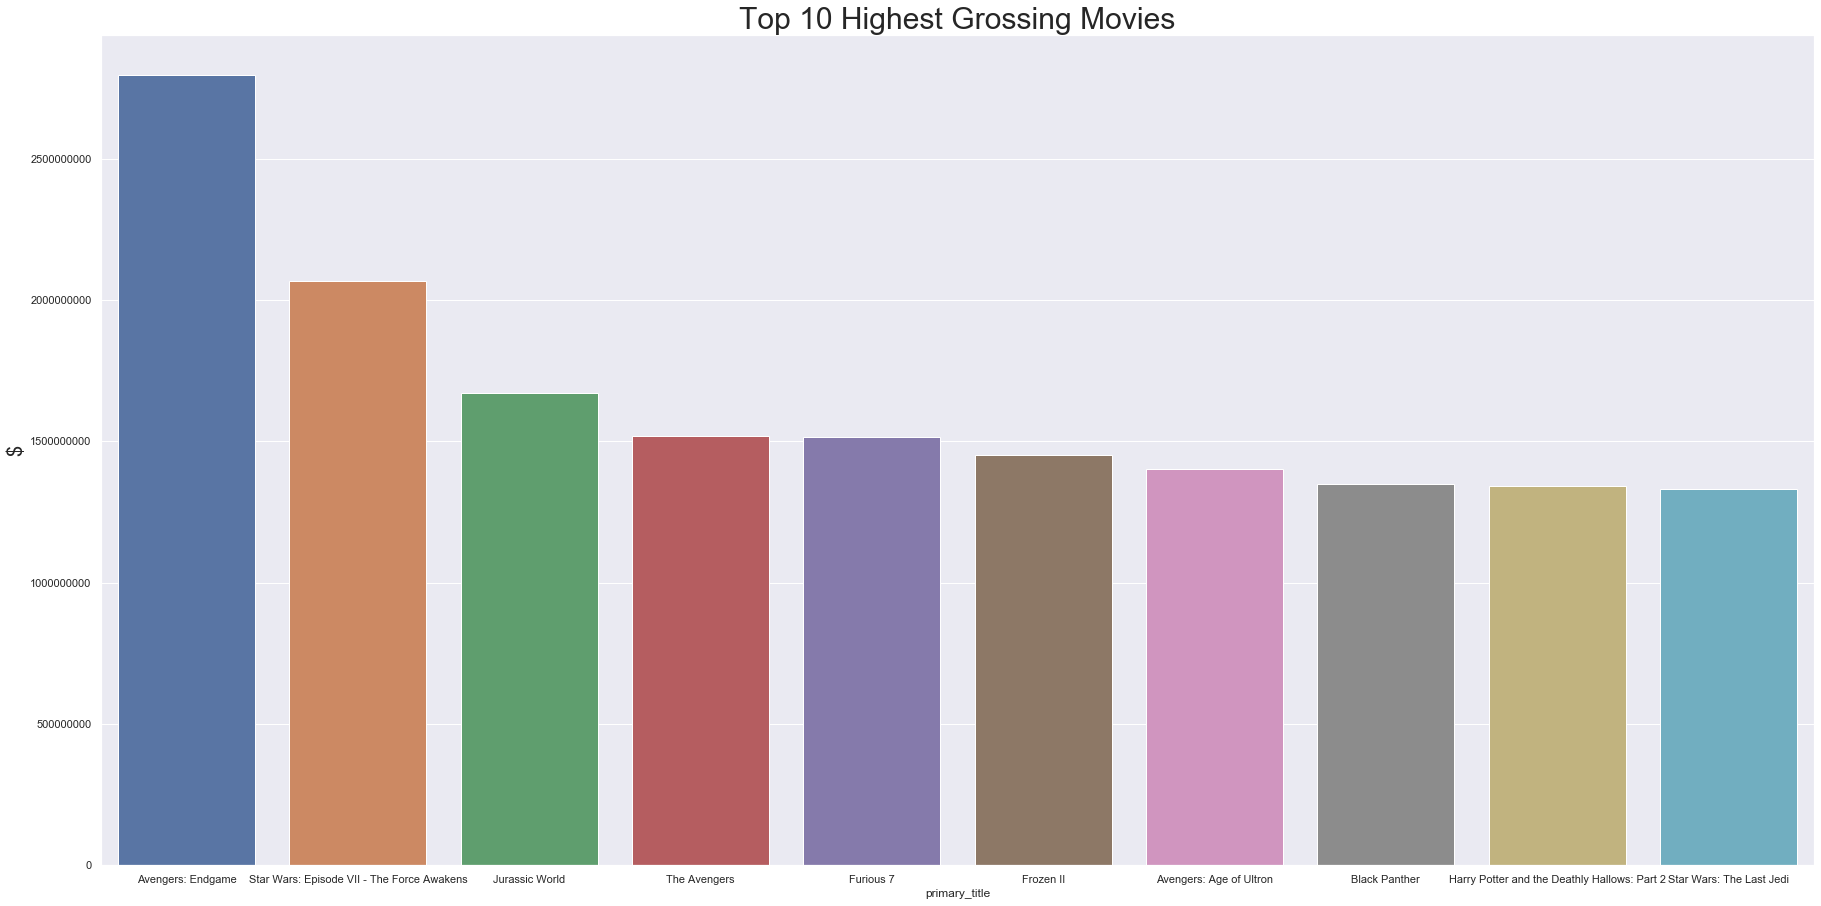

In [10]:
sns.set(style="whitegrid")
y = highest_grossing.values
x = highest_grossing.index
sns.set(rc={'figure.figsize':(30.7,15.27)})
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("$", size=20)

sns.barplot(x,y).set_title('Top 10 Highest Grossing Movies', size=30);

# Movie Releases by Year

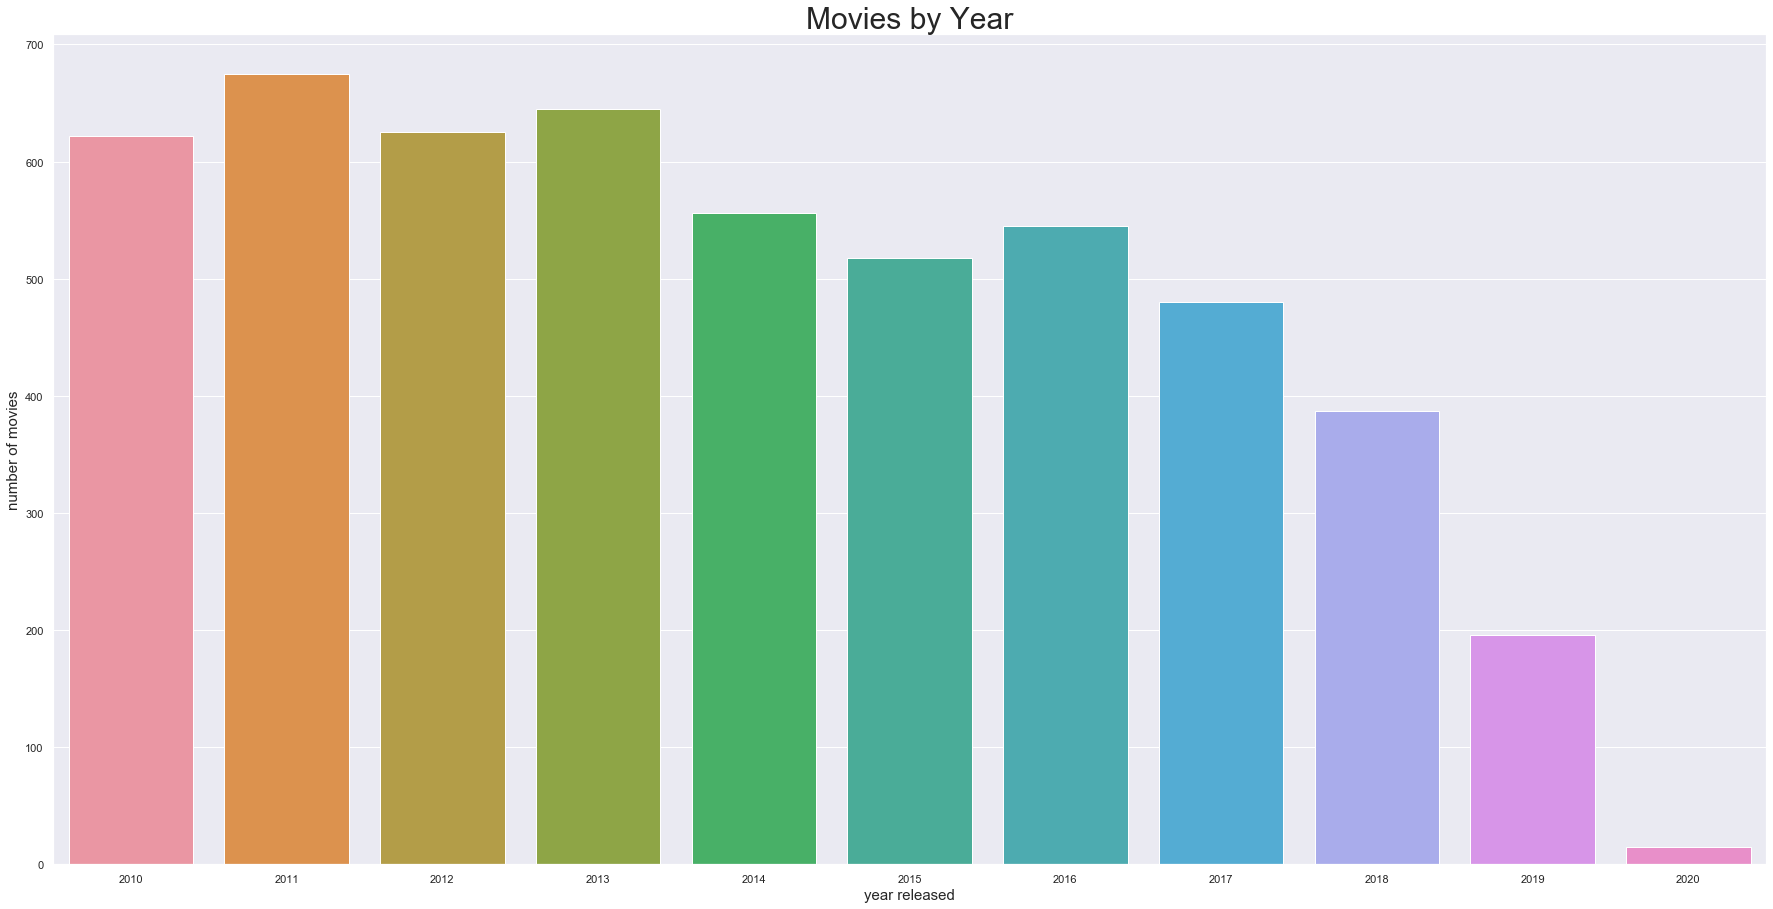

In [11]:
sns.countplot(x="start_year", data=df).set_title('Movies by Year', size=30);
sns.set(rc={'figure.figsize':(15.7,8.27)})
plt.ylabel("number of movies", size=15)
plt.xlabel("year released", size=15);
# sns.set_theme(style="darkgrid")

# More specific plotting..

In [12]:
df['Profit']

primary_title
Jurassic World           1.520401e+09
John Carter              3.413910e+07
Alice in Wonderland      8.254678e+08
From Paris with Love     8.444960e+05
The Bourne Legacy        1.511448e+08
                             ...     
Dying to Survive         4.361834e+08
The Bachelor 2           1.310969e+06
Prince In Exile         -8.757249e+06
Goodachari              -5.550310e+05
Sajjan Singh Rangroot   -1.385315e+06
Name: Profit, Length: 5264, dtype: float64

In [13]:
upper_bound[0]

36000000.0

In [14]:
votes_and_ratings = df.loc[(df['averagerating'] > 3.400) & (df['averagerating'] < 7167.0) & (df['numvotes'] < 7218409.5) & (df['numvotes'] > -2503126.0) & (df['Budget'] > -200000.000) & (df['Budget'] < 16200000.0)]

votes_and_ratings

,Country,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,genres,averagerating,numvotes,...,Fantasy,Family,Drama,War,Animation,Western,Mystery,Crime,Sci-Fi,Roi
primary_title,,,,,,,,,,,,,,,,,,,,,
African Cats,USA,5000000,6003200.0,15428747.0,30857747,2011,89.0,"['Adventure', 'Documentary']",7.6,5784.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,517.154940
The FP,USA,60000,15465.0,40557.0,40557,2011,82.0,['Comedy'],5.6,1541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.405000
SubHysteria,USA,130000,NaN,NaN,213015,2010,85.0,"['Drama', 'Thriller']",6.9,81.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,63.857692
The Pack,France,3357900,NaN,NaN,274839,2010,84.0,['Horror'],4.8,1987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-91.815152
Close Enemy,Russia,4500000,NaN,NaN,1035474,2010,98.0,['Crime'],5.5,148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,-76.989467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dying to Survive,China,15000000,3238.0,6752.0,451183391,2018,117.0,"['Comedy', 'Drama']",8.1,2803.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2907.889273
The Bachelor 2,Greece,643500,NaN,NaN,1954469,2017,111.0,['Comedy'],5.5,586.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.724786
Prince In Exile,India,8940000,NaN,NaN,182751,2018,158.0,"['Action', 'Drama']",4.9,2345.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-97.955805


# Average Rating vs Number of Votes

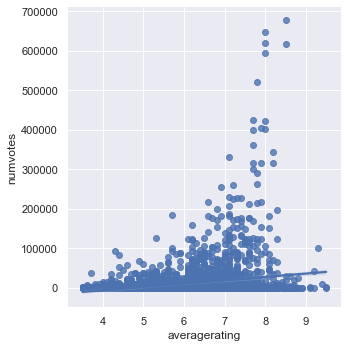

In [15]:
sns.lmplot(x="averagerating", y="numvotes", data=votes_and_ratings);

# budget vs profit for movies with rating between 6 and 8

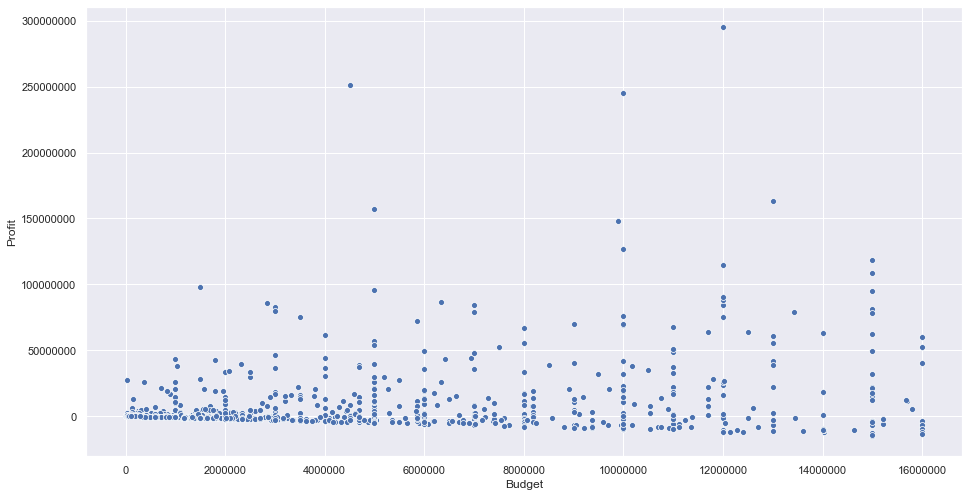

In [16]:
optimal_rating = votes_and_ratings.loc[(votes_and_ratings['averagerating'] > 6.5) & (votes_and_ratings['averagerating'] < 8)]
sns.scatterplot(data=optimal_rating, x="Budget", y="Profit")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

# budget vs profit for movies with rating from 0 to 6.5

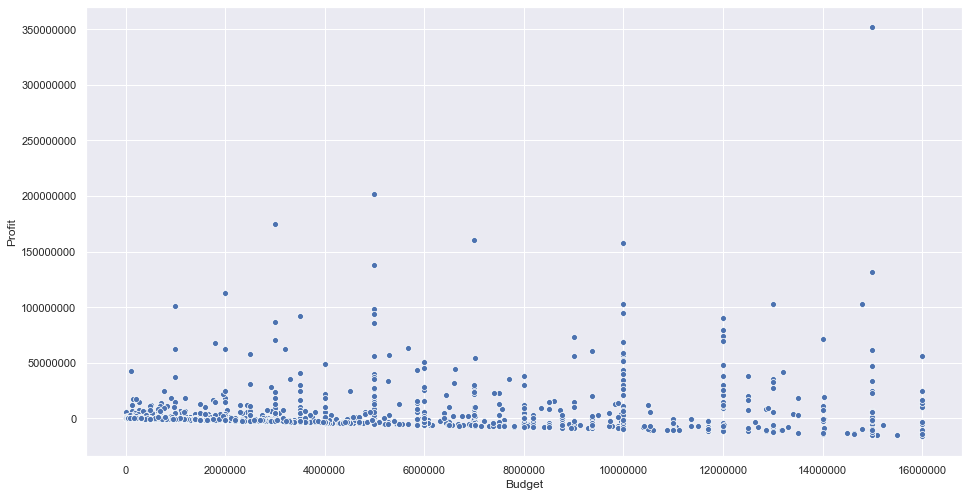

In [17]:
low_rating = votes_and_ratings.loc[(votes_and_ratings['averagerating'] > 0.0) & (votes_and_ratings['averagerating'] < 6.5)]
sns.scatterplot(data=low_rating, x="Budget", y="Profit")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

# budget vs profit for movies with rating greater than 6.5

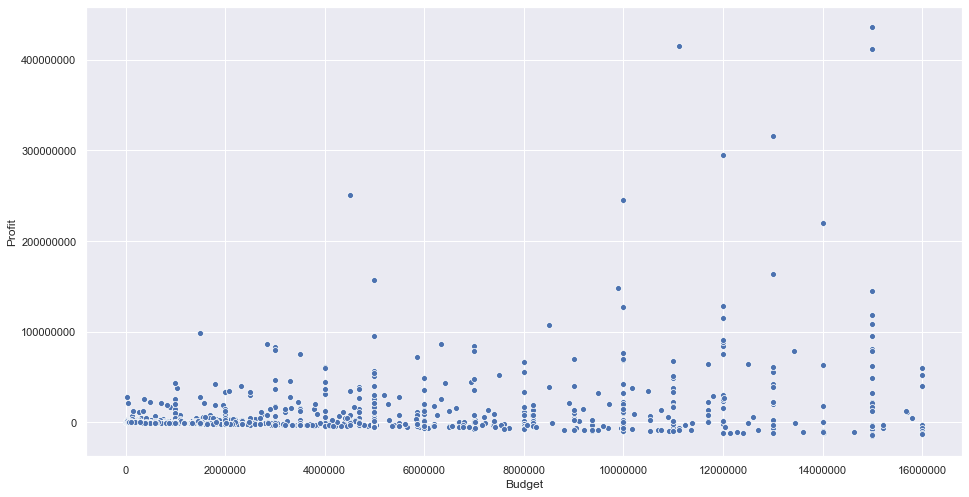

In [18]:
high_rating = votes_and_ratings.loc[(votes_and_ratings['averagerating'] > 6.5)]
sns.scatterplot(data=high_rating, x="Budget", y="Profit")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

In [19]:
df

,Country,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,genres,averagerating,numvotes,...,Fantasy,Family,Drama,War,Animation,Western,Mystery,Crime,Sci-Fi,Roi
primary_title,,,,,,,,,,,,,,,,,,,,,
Jurassic World,USA,150000000,208806270.0,652270625.0,1670401444,2015,124.0,"['Action', 'Adventure', 'Sci-Fi']",7.0,539338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1013.600963
John Carter,USA,250000000,30180188.0,73078100.0,284139100,2012,132.0,"['Action', 'Adventure', 'Sci-Fi']",6.6,241792.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.655640
Alice in Wonderland,USA,200000000,116101023.0,334191110.0,1025467803,2010,108.0,"['Adventure', 'Family', 'Fantasy']",6.5,358813.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412.733902
From Paris with Love,France,52000000,8158860.0,24077427.0,52844496,2010,92.0,"['Action', 'Crime', 'Thriller']",6.5,107079.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.624031
The Bourne Legacy,USA,125000000,38142825.0,113203870.0,276144750,2012,135.0,"['Action', 'Adventure', 'Thriller']",6.7,268678.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.915800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dying to Survive,China,15000000,3238.0,6752.0,451183391,2018,117.0,"['Comedy', 'Drama']",8.1,2803.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2907.889273
The Bachelor 2,Greece,643500,NaN,NaN,1954469,2017,111.0,['Comedy'],5.5,586.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.724786
Prince In Exile,India,8940000,NaN,NaN,182751,2018,158.0,"['Action', 'Drama']",4.9,2345.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-97.955805


In [20]:
worst_movies = df['Profit'].groupby(level='primary_title').sum().sort_values(ascending=True)[:10]
worst_movies

primary_title
The Irishman                       -158031147.0
Mars Needs Moms                    -110766322.0
The Flowers of War                  -91144356.0
Live by Night                       -85321445.0
Saint Seiya: Legend of Sanctuary    -82849197.0
Ninguém Entra, Ninguém Sai          -80303550.0
American Renegades                  -74840151.0
Missing Link                        -73572687.0
The Nutcracker in 3D                -72822007.0
How Do You Know                     -71331093.0
Name: Profit, dtype: float64

In [21]:
top_10_profitable_directors = df.groupby(['director']).sum().sort_values('Profit', ascending=False)[:50]
top_10_profitable_directors

,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,averagerating,numvotes,Profit,Comedy,...,Fantasy,Family,Drama,War,Animation,Western,Mystery,Crime,Sci-Fi,Roi
director,,,,,,,,,,,,,,,,,,,,,
David Yates,806500000,469301146.0,1.197994e+09,4144756575,10071,652.0,36.0,1796023.0,3.338257e+09,0.0,...,4.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2355.681050
J.J. Abrams,760000000,530967266.0,1.807648e+09,3869829516,8058,380.0,22.7,1550890.0,3.109830e+09,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1600.944665
James Wan,376500000,310459455.0,9.630646e+08,3244512143,10069,601.0,35.3,1391060.0,2.868012e+09,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,12488.228049
Christopher Nolan,880000000,341896480.0,1.159676e+09,3426085264,10073,587.0,33.7,4994749.0,2.546085e+09,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1543.379055
Joss Whedon,470000000,398709817.0,1.082364e+09,2921625055,4027,284.0,15.4,1849249.0,2.451625e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1051.494505
Bill Condon,439000000,463653821.0,1.116242e+09,2878287555,12087,593.0,30.7,756159.0,2.439288e+09,0.0,...,3.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,2166.734426
Peter Jackson,655000000,212986834.0,8.164902e+08,2931390211,6039,474.0,23.1,1723813.0,2.276390e+09,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.350722
Michael Bay,648000000,262815833.0,7.778736e+08,2920578857,8055,602.0,23.5,956722.0,2.272579e+09,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1316.833031
Francis Lawrence,522000000,416333676.0,1.149112e+09,2547380130,10071,666.0,34.2,1449439.0,2.025380e+09,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1708.959068


In [22]:
top_profit_director = df.loc[df['director'] == 'David Yates']
top_profit_director

,Country,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,genres,averagerating,numvotes,...,Fantasy,Family,Drama,War,Animation,Western,Mystery,Crime,Sci-Fi,Roi
primary_title,,,,,,,,,,,,,,,,,,,,,
Fantastic Beasts and Where to Find Them,UK,180000000,74403387.0,234037575.0,814043616,2016,132.0,"['Adventure', 'Family', 'Fantasy']",7.3,365353.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.246453
Harry Potter and the Deathly Hallows: Part 1,UK,121500000,125017372.0,296347721.0,976965014,2010,146.0,"['Adventure', 'Fantasy', 'Mystery']",7.7,425530.0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,704.086431
Harry Potter and the Deathly Hallows: Part 2,UK,125000000,169189427.0,381409310.0,1342191687,2011,130.0,"['Adventure', 'Drama', 'Fantasy']",8.1,691835.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,973.753350
The Legend of Tarzan,UK,180000000,38527856.0,126643061.0,356700357,2016,110.0,"['Action', 'Adventure', 'Drama']",6.3,150154.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,98.166865
Fantastic Beasts: The Crimes of Grindelwald,UK,200000000,62163104.0,159555901.0,654855901,2018,134.0,"['Adventure', 'Family', 'Fantasy']",6.6,163151.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.427951


# Worst Director

In [23]:
top_10_profitable_directors = df.groupby(['director']).sum().sort_values('Profit', ascending=True)[:10]
top_10_profitable_directors

,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,averagerating,numvotes,Profit,Comedy,...,Fantasy,Family,Drama,War,Animation,Western,Mystery,Crime,Sci-Fi,Roi
director,,,,,,,,,,,,,,,,,,,,,
Simon Wells,150000000,6914488.0,21392758.0,39233678,2011,88.0,5.4,19823.0,-110766322.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-73.844215
Denis Chernov,95000000,0.0,0.0,8830073,4034,164.0,10.6,285.0,-86169927.0,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-181.391542
Kei'ichi Sato,100000000,0.0,0.0,17150803,2014,93.0,5.5,3847.0,-82849197.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-82.849197
Nikita Mikhalkov,90000000,0.0,0.0,9892562,4021,338.0,8.2,5587.0,-80107438.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-178.016529
Andrey Konchalovskiy,91404000,65944.0,195459.0,17220484,4024,200.0,11.4,4536.0,-74183516.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-177.886917
Chris Butler,100000000,5944950.0,16649539.0,26427313,2019,94.0,7.0,3278.0,-73572687.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-73.572687
James L. Brooks,120000000,7484696.0,30212620.0,48668907,2010,121.0,5.4,41072.0,-71331093.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-59.442578
Peng Zhang,75000000,0.0,0.0,7353354,2018,141.0,3.3,139.0,-67646646.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-90.195528
Lawrence Kasanoff,65000000,0.0,0.0,120141,2012,91.0,1.9,8248.0,-64879859.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-99.815168


In [24]:
df.loc[df['director'] == 'Simon Wells']['Profit']

primary_title
Mars Needs Moms   -110766322.0
Name: Profit, dtype: float64

In [25]:
df.loc[(['There Be Dragons'])]['Profit']

primary_title
There Be Dragons   -31627358.0
Name: Profit, dtype: float64

# Inspecting ROI

In [26]:
roi_df = df.loc[(df['Roi'] > -420) & (df['Roi'] < 453)]

In [27]:
top_10_roi_titles = roi_df['Roi'].sort_values(ascending=False)[:10]

In [28]:
top_10_roi_titles[1]

451.57517583892616

# Top 10 Movies with Highest ROI (outliers removed)

In [29]:
df['Roi'].sort_values(ascending=False)

primary_title
One Cut of the Dead               131281.809524
Er Conde Jones                    117115.400000
Cumali Ceber: Allah Seni Alsin    108805.615385
CM101MMXI Fundamentals             53548.387179
The Gallows                        42864.410000
                                      ...      
In Their Sleep                       -99.995543
My Name Is Lenny                     -99.995650
Road to La Paz                       -99.997385
Inbred                               -99.997630
Dead Heart                           -99.998700
Name: Roi, Length: 5264, dtype: float64

In [33]:
df['Budget'].sort_values().head(50)

primary_title
Interlude                                                           1000
Una mujer                                                           1000
Charlie Casanova                                                    1096
The Worst Movie Ever!                                               1100
Cumali Ceber: Allah Seni Alsin                                      1300
Hijab, mulheres de véu                                              1300
Requirements to Be a Normal Person                                  1404
To Die Is Hard                                                      1500
The Butcher Possessions                                             1620
5x Pacificação                                                      1690
Xenia                                                               1755
Pibe Chorro                                                         2000
Midget Zombie Takeover                                              2000
Auto Shop of Horrors                 

In [41]:
df['Budget'].describe()[2]

36143828.36198738

In [45]:
df.groupby('director').sum().sort_values('Roi', ascending = False)

,Budget,Opening Weekend USA,Gross USA,Cumulative Worldwide Gross,start_year,runtime_minutes,averagerating,numvotes,Profit,Comedy,...,Fantasy,Family,Drama,War,Animation,Western,Mystery,Crime,Sci-Fi,Roi
director,,,,,,,,,,,,,,,,,,,,,
Benjamin Rausseo,5000,0.0,0.0,5860770,2011,0.0,4.2,75.0,5855770.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117115.400000
Murat Dündar,39000,0.0,0.0,20922871,2013,139.0,9.2,41560.0,20883871.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53548.387179
Leticia Dolera,1404,0.0,0.0,468761,2015,90.0,6.5,2299.0,467357.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33287.535613
Gustavo Hernández,556000,0.0,0.0,1186309,4024,176.0,11.0,7199.0,630309.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18962.174000
Hugo de Sousa,9126,0.0,0.0,1590312,2012,97.0,3.0,492.0,1581186.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17326.166995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
John Stockwell,50000000,5565.0,5565.0,2055816,8056,402.0,21.4,36538.0,-47944184.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,-386.391862
Ernie Barbarash,30000000,8691.0,11774.0,641201,8052,423.0,23.3,41361.0,-29358799.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,-389.498279
Keoni Waxman,21300000,0.0,0.0,292803,8056,382.0,17.1,11016.0,-21007197.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,-391.146364


In [56]:
worst_animation_movies = df[df['Animation'] == 1].sort_values(['Profit'], ascending=True).head(10)